# Import Isomarker

In [1]:
from isomarker.isomarker import *

# Run "pip install isomarker" if not installed already

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import anndata as ad
import scanpy as sc

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats

import shap
import xgboost
from jenkspy import JenksNaturalBreaks

from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import gmean

from upsetplot import from_memberships
from upsetplot import from_contents
from upsetplot import UpSet

from adjustText import adjust_text
from itertools import chain

import jax
from jax import numpy as jnp

In [37]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

# Read Sample Data

In [3]:
adata = ad.read_h5ad('sample_anndata.h5ad')

# Pseudobulk RNA-seq Sample Dataset as an AnnData object is used for input to IsoMarker
# Sample (row - obs) X Gene (column - var)
# Raw counts in adata.X

In [4]:
adata

AnnData object with n_obs × n_vars = 120 × 1046
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'custombatch', 'Lineage', 'nCells', 'Study'
    var: 'Plasma Membrane Localization'

In [5]:
adata.X

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 4., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 2., ..., 0., 0., 0.]])

In [6]:
adata.obs

# Anndata.obs contains the study batch ("Study") and the group ("Lineage) 

,orig.ident,nCount_RNA,nFeature_RNA,custombatch,Lineage,nCells,Study
AML_pvg2019_AML210A__MEP_MkP,AML,128127.0,9840,AML_pvg2019_AML210A,MEP_MkP,45,vanGalen_2019
AML_Ennis2023_3853_R__MEP_MkP,AML,21098.0,4764,AML_Ennis2023_3853_R,MEP_MkP,1,Ennis_2023
AML_CloneTracer2023_A.14__MEP_MkP,AML,111806.0,9005,AML_CloneTracer2023_A.14,MEP_MkP,5,BeneytoCalabuig_2023
AML_Naldini2023_M41_PT13_DX__MEP_MkP,AML,3170074.0,14939,AML_Naldini2023_M41_PT13_DX,MEP_MkP,246,Naldini_2023
AML_CloneTracer2023_B.4__MEP_MkP,AML,107497.0,8879,AML_CloneTracer2023_B.4,MEP_MkP,6,BeneytoCalabuig_2023
...,...,...,...,...,...,...,...
scAML_AEL_MLL_30886__Pro_B,scAML,76512.0,7751,scAML_AEL_MLL_30886,Pro_B,17,This_Study
AML_Ennis2023_1216_R__Pro_B,AML,297627.0,11903,AML_Ennis2023_1216_R,Pro_B,40,Ennis_2023
AML_CloneTracer2023_A.6__Pro_B,AML,25703.0,5291,AML_CloneTracer2023_A.6,Pro_B,1,BeneytoCalabuig_2023
AML_Naldini2023_M85_PT17_D30__Pro_B,AML,2064.0,1031,AML_Naldini2023_M85_PT17_D30,Pro_B,1,Naldini_2023


# Objective: Identify Cell-State Markers for each group in Lineage

# Visualization: Cell State Dimensionality-Reduced Plots

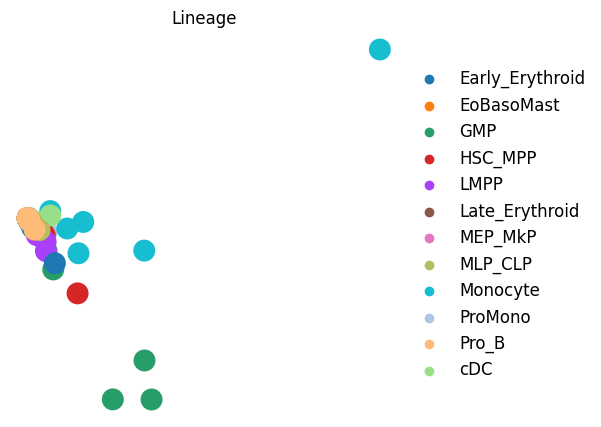

In [7]:
pca_plot_lineage(adata=adata, lineage='Lineage')

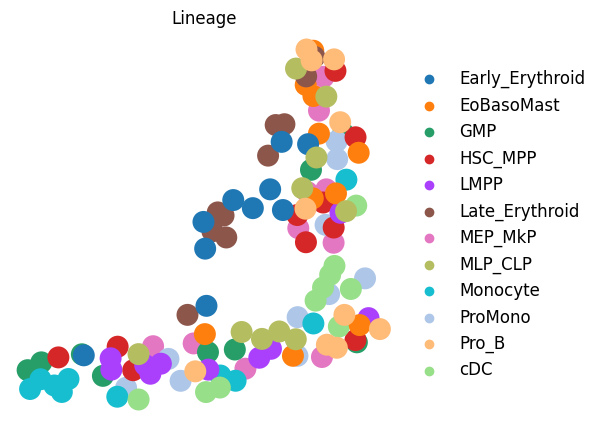

In [8]:
umap_plot_lineage(adata=adata, lineage='Lineage')

Found 58 genes with zero variance.


invalid value encountered in divide
divide by zero encountered in divide


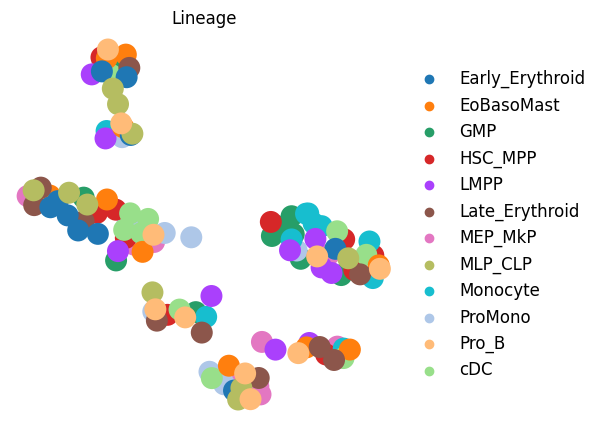

In [9]:
# Optional: Batch Correction with COMBAT
umap_plot_lineage(adata=adata, lineage='Lineage', batch='Study')

# Visualization: Gene Expression

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


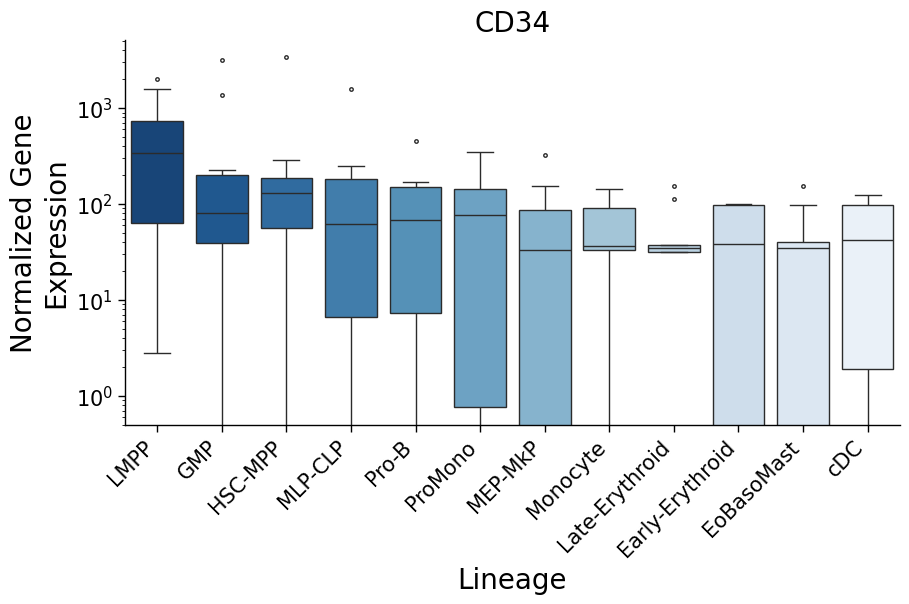

In [10]:
lineage_gex(adata = adata, gene='CD34', lineage='Lineage', log=True)

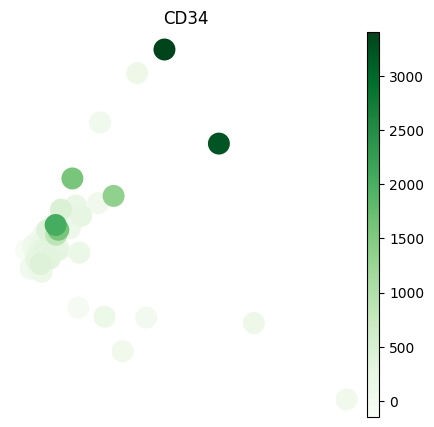

In [11]:
pca_plot_marker(adata=adata, marker='CD34')

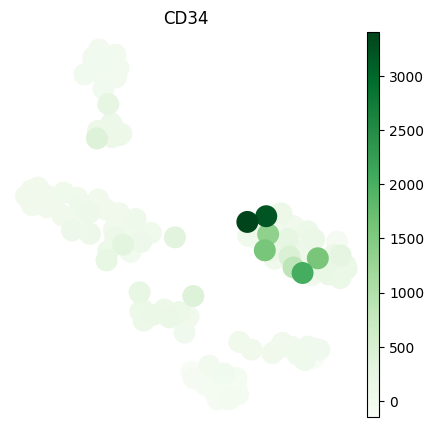

In [12]:
umap_plot_marker(adata=adata, marker='CD34')

Found 58 genes with zero variance.


invalid value encountered in divide
divide by zero encountered in divide


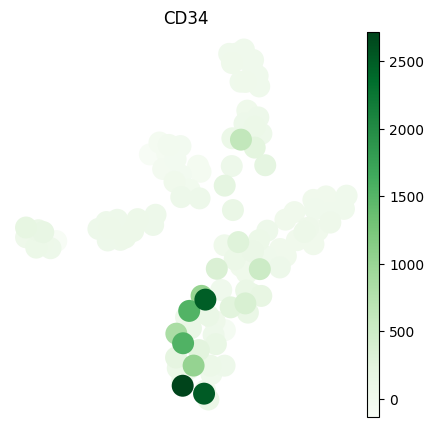

In [13]:
# Optional: Batch Correction with COMBAT
umap_plot_marker(adata=adata, marker='CD34', batch='Study')

# Analysis: Differential Expression

### Identify Markers using DESeq2 for the HSC-MPP Cell State

In [15]:
HSCMPP_dge_markers = pydeseq2_1_vs_rest(adata, lineage='Lineage', reference='HSC_MPP')

Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 3.31 seconds.

Fitting dispersion trend curve...
The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
... done in 0.05 seconds.

Fitting MAP dispersions...
... done in 3.12 seconds.

Fitting LFCs...
... done in 1.75 seconds.

Replacing 141 outlier genes.

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
Fitting dispersions...
... done in 0.36 seconds.

Fitting MAP dispersions...
... done in 0.27 seconds.

Fitting LFCs...
... done in 0.21 seconds.

Running Wald tests...
... done in 0.62 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: Lineage Other vs HSC-MPP
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AADAT     1.637960       -0.764972  0.471611 -1.622039  0.104795       NaN
ABCA12    1.280891        0.377904  0.604706  0.624938  0.532012       NaN
ABCC5    10.004309        0.891662  0.535615  1.664745  0.095964  0.409322
ABHD3    11.518998        0.279977  0.483690  0.578835  0.562700  0.844230
ABI1     43.206546        0.191505  0.514274  0.372380  0.709610  0.923221
...            ...             ...       ...       ...       ...       ...
ABITRAM   3.473281        0.864715  0.553018  1.563629  0.117905  0.445737
CIAO3     5.142314        0.705067  0.596632  1.181746  0.237307  0.602708
RSKR      2.959896        0.602194  0.551726  1.091473  0.275065  0.641129
CCN5      1.255780        0.192079  0.597322  0.321567  0.747781       NaN
SEPTIN3   1.289840        0.399683  0.602704  0.663151  0.507234       NaN

[1046 rows x 6 columns]
Shrunk log2 

... done in 1.49 seconds.



In [16]:
HSCMPP_dge_markers

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
AADAT,1.637960,0.144280,0.253509,-1.622039,0.104795,NaN
ABCA12,1.280891,-0.026031,0.193573,0.624938,0.532012,NaN
ABCC5,10.004309,-0.098315,0.223758,1.664745,0.095964,0.409322
ABHD3,11.518998,-0.038294,0.189711,0.578835,0.562700,0.844230
ABI1,43.206546,-0.015130,0.187507,0.372380,0.709610,0.923221
...,...,...,...,...,...,...
ABITRAM,3.473281,-0.094357,0.220056,1.563629,0.117905,0.445737
CIAO3,5.142314,-0.061101,0.203008,1.181746,0.237307,0.602708
RSKR,2.959896,-0.062367,0.201363,1.091473,0.275065,0.641129
CCN5,1.255780,-0.013805,0.192115,0.321567,0.747781,NaN


### Identify Markers using DESeq2 for All Cell States

In [17]:
lfc_data = pydeseq2_1_vs_rest_wrapper(adata=adata, lineage='Lineage')

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 2.38 seconds.

Fitting dispersion trend curve...
The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
... done in 0.04 seconds.

Fitting MAP dispersions...
... done in 2.78 seconds.

Fitting LFCs...
... done in 1.57 seconds.

Replacing 124 outlier genes.

Fitting dispersions...
... done in 0.28 seconds.

Fitting MAP dispersions...
... done in 0.24 seconds.

Fitting LFCs...
... done in 0.17 seconds.

Running Wald tests...
... done in 0.63 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: Lineage Other vs EoBasoMast
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AADAT     1.637960       -0.011328  0.591460 -0.019152  0.984720       NaN
ABCA12    1.280891       -0.770040  0.600882 -1.281517  0.200012       NaN
ABCC5     8.370976        0.000869  0.483636  0.001796  0.998567  0.998567
ABHD3    11.518998        1.119421  0.512462  2.184398  0.028933  0.064176
ABI1     43.206546        1.291596  0.518091  2.492991  0.012667  0.041267
...            ...             ...       ...       ...       ...       ...
ABITRAM   3.473281        0.442309  0.573670  0.771016  0.440698       NaN
CIAO3     5.142314        1.420051  0.664920  2.135671  0.032706       NaN
RSKR      2.959896        0.087609  0.565366  0.154959  0.876853       NaN
CCN5      1.255780       -0.840076  0.602331 -1.394710  0.163103       NaN
SEPTIN3   1.289840       -0.755897  0.598923 -1.262096  0.206914       NaN

[1046 rows x 6 columns]


... done in 1.43 seconds.

Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
Fitting size factors...
... done in 0.00 seconds.



Shrunk log2 fold change & Wald test p-value: Lineage EoBasoMast vs Other
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AADAT     1.637960        0.005066  0.411940 -0.019152  0.984720       NaN
ABCA12    1.280891        0.366626  0.497821 -1.281517  0.200012       NaN
ABCC5     8.370976       -0.152996  0.375784  0.001796  0.998567  0.998567
ABHD3    11.518998       -0.773760  0.533942  2.184398  0.028933  0.064176
ABI1     43.206546       -0.912400  0.588343  2.492991  0.012667  0.041267
...            ...             ...       ...       ...       ...       ...
ABITRAM   3.473281       -0.217692  0.427813  0.771016  0.440698       NaN
CIAO3     5.142314       -0.811491  0.722336  2.135671  0.032706       NaN
RSKR      2.959896       -0.043657  0.399100  0.154959  0.876853       NaN
CCN5      1.255780        0.406186  0.514174 -1.394710  0.163103       NaN
SEPTIN3   1.289840        0.359993  0.494487 -1.262096  0.206914       NaN

[1046 rows x 6 columns]


Fitting dispersions...
... done in 2.27 seconds.

Fitting dispersion trend curve...
The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
... done in 0.04 seconds.

Fitting MAP dispersions...
... done in 3.06 seconds.

Fitting LFCs...
... done in 1.53 seconds.

Replacing 120 outlier genes.

Fitting dispersions...
... done in 0.26 seconds.

Fitting MAP dispersions...
... done in 0.24 seconds.

Fitting LFCs...
... done in 0.16 seconds.

Running Wald tests...
... done in 0.59 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: Lineage Other vs Late-Erythroid
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AADAT     1.637960       -0.046183  0.591052 -0.078137  0.937719  0.961855
ABCA12    1.280891       -0.806954  0.600385 -1.344060  0.178929       NaN
ABCC5    10.004309       -1.814224  0.478867 -3.788579  0.000152  0.000971
ABHD3    11.518998        0.879237  0.505124  1.740635  0.081748  0.184759
ABI1     43.206546        1.151702  0.517210  2.226760  0.025963  0.074034
...            ...             ...       ...       ...       ...       ...
ABITRAM   3.473281       -0.810064  0.509189 -1.590890  0.111634  0.240490
CIAO3     5.142314        0.705163  0.621980  1.133739  0.256904  0.447437
RSKR      2.959896        0.391804  0.585431  0.669258  0.503331  0.664873
CCN5      1.255780       -0.877143  0.601830 -1.457461  0.144989       NaN
SEPTIN3   1.289840       -0.793445  0.598426 -1.325887  0.184877       NaN

[1046 rows x 6 columns]


... done in 1.54 seconds.

Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
Fitting size factors...
... done in 0.01 seconds.



Shrunk log2 fold change & Wald test p-value: Lineage Late-Erythroid vs Other
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AADAT     1.637960        0.031536  0.498963 -0.078137  0.937719  0.961855
ABCA12    1.280891        0.568056  0.556792 -1.344060  0.178929       NaN
ABCC5    10.004309        1.638983  0.458781 -3.788579  0.000152  0.000971
ABHD3    11.518998       -0.704073  0.483495  1.740635  0.081748  0.184759
ABI1     43.206546       -0.950311  0.526365  2.226760  0.025963  0.074034
...            ...             ...       ...       ...       ...       ...
ABITRAM   3.473281        0.649405  0.457673 -1.590890  0.111634  0.240490
CIAO3     5.142314       -0.491340  0.553681  1.133739  0.256904  0.447437
RSKR      2.959896       -0.274792  0.502554  0.669258  0.503331  0.664873
CCN5      1.255780        0.621755  0.565302 -1.457461  0.144989       NaN
SEPTIN3   1.289840        0.558987  0.554273 -1.325887  0.184877       NaN

[1046 rows x 6 columns

Fitting dispersions...
... done in 2.41 seconds.

Fitting dispersion trend curve...
The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
... done in 0.04 seconds.

Fitting MAP dispersions...
... done in 2.74 seconds.

Fitting LFCs...
... done in 1.52 seconds.

Replacing 125 outlier genes.

Fitting dispersions...
... done in 0.24 seconds.

Fitting MAP dispersions...
... done in 0.23 seconds.

Fitting LFCs...
... done in 0.17 seconds.

Running Wald tests...
... done in 0.61 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: Lineage Other vs MEP-MkP
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AADAT     1.637960        0.347817  0.580008  0.599677  0.548721  0.842725
ABCA12    1.280891       -0.288982  0.602851 -0.479359  0.631684       NaN
ABCC5     8.370976       -0.620431  0.460901 -1.346128  0.178261  0.582686
ABHD3    11.518998        0.915563  0.495593  1.847410  0.064688  0.377939
ABI1     43.206546        0.532038  0.515197  1.032689  0.301750  0.711242
...            ...             ...       ...       ...       ...       ...
ABITRAM   3.473281        0.670284  0.560664  1.195518  0.231885  0.644413
CIAO3     5.142314        1.047417  0.618299  1.694029  0.090260  0.434863
RSKR      2.959896        1.338904  0.624551  2.143785  0.032050  0.261806
CCN5      1.255780       -0.506126  0.590160 -0.857609  0.391109       NaN
SEPTIN3   1.289840       -0.274018  0.600890 -0.456020  0.648375       NaN

[1046 rows x 6 columns]


... done in 1.42 seconds.

Fitting size factors...
... done in 0.01 seconds.



Shrunk log2 fold change & Wald test p-value: Lineage MEP-MkP vs Other
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AADAT     1.637960       -0.056938  0.251725  0.599677  0.548721  0.842725
ABCA12    1.280891        0.041053  0.253787 -0.479359  0.631684       NaN
ABCC5     8.370976        0.093959  0.245604 -1.346128  0.178261  0.582686
ABHD3    11.518998       -0.232189  0.367984  1.847410  0.064688  0.377939
ABI1     43.206546       -0.088805  0.261277  1.032689  0.301750  0.711242
...            ...             ...       ...       ...       ...       ...
ABITRAM   3.473281       -0.121413  0.278298  1.195518  0.231885  0.644413
CIAO3     5.142314       -0.160520  0.316645  1.694029  0.090260  0.434863
RSKR      2.959896       -0.257739  0.427495  2.143785  0.032050  0.261806
CCN5      1.255780        0.076357  0.263807 -0.857609  0.391109       NaN
SEPTIN3   1.289840        0.039155  0.253234 -0.456020  0.648375       NaN

[1046 rows x 6 columns]


Fitting dispersions...
... done in 2.37 seconds.

Fitting dispersion trend curve...
The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
... done in 0.04 seconds.

Fitting MAP dispersions...
... done in 2.79 seconds.

Fitting LFCs...
... done in 1.57 seconds.

Replacing 117 outlier genes.

Fitting dispersions...
... done in 0.22 seconds.

Fitting MAP dispersions...
... done in 0.22 seconds.

Fitting LFCs...
... done in 0.17 seconds.

Running Wald tests...
... done in 0.73 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: Lineage Other vs cDC
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AADAT     1.637960        0.608095  0.590997  1.028930  0.303512  0.701701
ABCA12    1.280891       -0.133816  0.603405 -0.221767  0.824495       NaN
ABCC5    10.004309        1.484814  0.545728  2.720796  0.006512  0.094656
ABHD3    11.518998        0.526010  0.484933  1.084706  0.278052  0.677150
ABI1     43.206546        0.718091  0.513502  1.398420  0.161987  0.564276
...            ...             ...       ...       ...       ...       ...
ABITRAM   3.473281       -0.405458  0.505413 -0.802231  0.422419  0.785113
CIAO3     5.142314        0.171942  0.581236  0.295821  0.767367  0.997375
RSKR      2.959896        0.425822  0.547729  0.777431  0.436905  0.792066
CCN5      1.255780       -0.201990  0.605092 -0.333816  0.738518       NaN
SEPTIN3   1.289840       -0.979570  0.527414 -1.857308  0.063267  0.336618

[1046 rows x 6 columns]


... done in 1.55 seconds.

Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
Fitting size factors...
... done in 0.00 seconds.



Shrunk log2 fold change & Wald test p-value: Lineage cDC vs Other
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AADAT     1.637960       -0.146874  0.322513  1.028930  0.303512  0.701701
ABCA12    1.280891        0.026741  0.295783 -0.221767  0.824495       NaN
ABCC5    10.004309       -0.911029  0.785703  2.720796  0.006512  0.094656
ABHD3    11.518998       -0.161879  0.316811  1.084706  0.278052  0.677150
ABI1     43.206546       -0.199776  0.352560  1.398420  0.161987  0.564276
...            ...             ...       ...       ...       ...       ...
ABITRAM   3.473281        0.129486  0.295920 -0.802231  0.422419  0.785113
CIAO3     5.142314       -0.040041  0.291689  0.295821  0.767367  0.997375
RSKR      2.959896       -0.111323  0.304269  0.777431  0.436905  0.792066
CCN5      1.255780        0.040390  0.298112 -0.333816  0.738518       NaN
SEPTIN3   1.289840        0.356723  0.462111 -1.857308  0.063267  0.336618

[1046 rows x 6 columns]


Fitting dispersions...
... done in 2.68 seconds.

Fitting dispersion trend curve...
The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
... done in 0.04 seconds.

Fitting MAP dispersions...
... done in 2.88 seconds.

Fitting LFCs...
... done in 1.61 seconds.

Replacing 155 outlier genes.

Fitting dispersions...
... done in 0.32 seconds.

Fitting MAP dispersions...
... done in 0.31 seconds.

Fitting LFCs...
... done in 0.21 seconds.

Running Wald tests...
... done in 0.60 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: Lineage Other vs Pro-B
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AADAT     1.637960       -0.164197  0.553027 -0.296907  0.766538       NaN
ABCA12    1.280891       -1.118873  0.548538 -2.039736  0.041377       NaN
ABCC5    10.004309        1.954898  0.582693  3.354936  0.000794  0.007131
ABHD3    11.518998       -0.676089  0.472352 -1.431324  0.152337  0.222246
ABI1     43.206546       -0.523003  0.510962 -1.023566  0.306040  0.387220
...            ...             ...       ...       ...       ...       ...
ABITRAM   3.473281        0.493990  0.563490  0.876661  0.380671  0.454948
CIAO3     5.142314       -0.599514  0.571924 -1.048240  0.294528  0.378880
RSKR      2.959896        0.345434  0.567959  0.608203  0.543053  0.611343
CCN5      1.255780       -0.590881  0.603426 -0.979210  0.327476       NaN
SEPTIN3   1.289840       -0.506613  0.599929 -0.844456  0.398415       NaN

[1046 rows x 6 columns]


... done in 1.50 seconds.

Fitting size factors...
... done in 0.00 seconds.



Shrunk log2 fold change & Wald test p-value: Lineage Pro-B vs Other
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AADAT     1.637960        0.086060  0.417149 -0.296907  0.766538       NaN
ABCA12    1.280891        0.741499  0.544947 -2.039736  0.041377       NaN
ABCC5    10.004309       -1.607188  0.649293  3.354936  0.000794  0.007131
ABHD3    11.518998        0.466014  0.400831 -1.431324  0.152337  0.222246
ABI1     43.206546        0.369540  0.418757 -1.023566  0.306040  0.387220
...            ...             ...       ...       ...       ...       ...
ABITRAM   3.473281       -0.270368  0.444239  0.876661  0.380671  0.454948
CIAO3     5.142314        0.344370  0.442626 -1.048240  0.294528  0.378880
RSKR      2.959896       -0.181933  0.430787  0.608203  0.543053  0.611343
CCN5      1.255780        0.284903  0.483308 -0.979210  0.327476       NaN
SEPTIN3   1.289840        0.242811  0.470584 -0.844456  0.398415       NaN

[1046 rows x 6 columns]


Fitting dispersions...
... done in 2.36 seconds.

Fitting dispersion trend curve...
The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
... done in 0.04 seconds.

Fitting MAP dispersions...
... done in 2.74 seconds.

Fitting LFCs...
... done in 1.64 seconds.

Replacing 82 outlier genes.

Fitting dispersions...
... done in 0.15 seconds.

Fitting MAP dispersions...
... done in 0.14 seconds.

Fitting LFCs...
... done in 0.11 seconds.

Running Wald tests...
... done in 0.59 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: Lineage Other vs Monocyte
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AADAT     1.637960        2.670576  0.569855  4.686412  0.000003  0.000029
ABCA12    1.280891        1.925399  0.589429  3.266547  0.001089  0.003592
ABCC5    10.004309        0.136169  0.509354  0.267336  0.789210  0.820590
ABHD3    11.518998       -1.290534  0.444157 -2.905584  0.003666  0.006921
ABI1     43.206546       -1.375230  0.491449 -2.798313  0.005137  0.009361
...            ...             ...       ...       ...       ...       ...
ABITRAM   3.473281       -0.996820  0.461429 -2.160291  0.030750  0.045495
CIAO3     5.142314       -0.076303  0.554599 -0.137582  0.890571  0.907047
RSKR      2.959896       -1.205281  0.455653 -2.645171  0.008165  0.013978
CCN5      1.255780        1.858317  0.591764  3.140303  0.001688  0.004490
SEPTIN3   1.289840        1.736691  0.570207  3.045718  0.002321  0.004752

[1046 rows x 6 columns]


... done in 1.46 seconds.

Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
Fitting size factors...
... done in 0.00 seconds.



Shrunk log2 fold change & Wald test p-value: Lineage Monocyte vs Other
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AADAT     1.637960       -2.447681  0.651594  4.686412  0.000003  0.000029
ABCA12    1.280891       -1.637139  0.668614  3.266547  0.001089  0.003592
ABCC5    10.004309       -0.109675  0.459088  0.267336  0.789210  0.820590
ABHD3    11.518998        1.164624  0.421996 -2.905584  0.003666  0.006921
ABI1     43.206546        1.217919  0.465161 -2.798313  0.005137  0.009361
...            ...             ...       ...       ...       ...       ...
ABITRAM   3.473281        0.872843  0.430830 -2.160291  0.030750  0.045495
CIAO3     5.142314        0.059376  0.486548 -0.137582  0.890571  0.907047
RSKR      2.959896        1.074429  0.430476 -2.645171  0.008165  0.013978
CCN5      1.255780       -1.565941  0.669458  3.140303  0.001688  0.004490
SEPTIN3   1.289840       -1.470391  0.626723  3.045718  0.002321  0.004752

[1046 rows x 6 columns]


Fitting dispersions...
... done in 2.49 seconds.

Fitting dispersion trend curve...
The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
... done in 0.04 seconds.

Fitting MAP dispersions...
... done in 2.76 seconds.

Fitting LFCs...
... done in 1.70 seconds.

Replacing 141 outlier genes.

Fitting dispersions...
... done in 0.31 seconds.

Fitting MAP dispersions...
... done in 0.29 seconds.

Fitting LFCs...
... done in 0.21 seconds.

Running Wald tests...
... done in 0.58 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: Lineage Other vs HSC-MPP
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AADAT     1.637960       -0.764972  0.471611 -1.622039  0.104795       NaN
ABCA12    1.280891        0.377904  0.604706  0.624938  0.532012       NaN
ABCC5    10.004309        0.891662  0.535615  1.664745  0.095964  0.409322
ABHD3    11.518998        0.279977  0.483690  0.578835  0.562700  0.844230
ABI1     43.206546        0.191505  0.514274  0.372380  0.709610  0.923221
...            ...             ...       ...       ...       ...       ...
ABITRAM   3.473281        0.864715  0.553018  1.563629  0.117905  0.445737
CIAO3     5.142314        0.705067  0.596632  1.181746  0.237307  0.602708
RSKR      2.959896        0.602194  0.551726  1.091473  0.275065  0.641129
CCN5      1.255780        0.192079  0.597322  0.321567  0.747781       NaN
SEPTIN3   1.289840        0.399683  0.602704  0.663151  0.507234       NaN

[1046 rows x 6 columns]


... done in 1.42 seconds.

Fitting size factors...
... done in 0.01 seconds.



Shrunk log2 fold change & Wald test p-value: Lineage HSC-MPP vs Other
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AADAT     1.637960        0.144280  0.253509 -1.622039  0.104795       NaN
ABCA12    1.280891       -0.026031  0.193573  0.624938  0.532012       NaN
ABCC5    10.004309       -0.098315  0.223758  1.664745  0.095964  0.409322
ABHD3    11.518998       -0.038294  0.189711  0.578835  0.562700  0.844230
ABI1     43.206546       -0.015130  0.187507  0.372380  0.709610  0.923221
...            ...             ...       ...       ...       ...       ...
ABITRAM   3.473281       -0.094357  0.220056  1.563629  0.117905  0.445737
CIAO3     5.142314       -0.061101  0.203008  1.181746  0.237307  0.602708
RSKR      2.959896       -0.062367  0.201363  1.091473  0.275065  0.641129
CCN5      1.255780       -0.013805  0.192115  0.321567  0.747781       NaN
SEPTIN3   1.289840       -0.027765  0.193824  0.663151  0.507234       NaN

[1046 rows x 6 columns]


Fitting dispersions...
... done in 2.44 seconds.

Fitting dispersion trend curve...
The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
... done in 0.04 seconds.

Fitting MAP dispersions...
... done in 2.85 seconds.

Fitting LFCs...
... done in 1.56 seconds.

Replacing 147 outlier genes.

Fitting dispersions...
... done in 0.29 seconds.

Fitting MAP dispersions...
... done in 0.29 seconds.

Fitting LFCs...
... done in 0.20 seconds.

Running Wald tests...
... done in 0.61 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: Lineage Other vs ProMono
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AADAT     1.637960        0.440039  0.546718  0.804874  0.420892  0.999537
ABCA12    1.280891        0.037454  0.589557  0.063530  0.949345  0.999537
ABCC5     8.370976        0.603943  0.477981  1.263529  0.206399  0.999537
ABHD3    11.518998       -0.569387  0.469475 -1.212815  0.225201  0.999537
ABI1     43.206546       -0.244801  0.512050 -0.478080  0.632594  0.999537
...            ...             ...       ...       ...       ...       ...
ABITRAM   3.473281        0.627640  0.538153  1.166286  0.243499  0.999537
CIAO3     5.142314        0.904296  0.597256  1.514085  0.130004  0.999537
RSKR      2.959896        0.865200  0.560276  1.544238  0.122531  0.999537
CCN5      1.255780        0.119842  0.605171  0.198030  0.843022  0.999537
SEPTIN3   1.289840        0.125700  0.594049  0.211599  0.832420  0.999537

[1046 rows x 6 columns]


... done in 2.60 seconds.

Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
Fitting size factors...
... done in 0.01 seconds.



Shrunk log2 fold change & Wald test p-value: Lineage ProMono vs Other
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AADAT     1.637960   -1.466679e-06  0.001060  0.804874  0.420892  0.999537
ABCA12    1.280891   -1.286480e-07  0.001070  0.063530  0.949345  0.999537
ABCC5     8.370976   -3.356673e-06  0.001047  1.263529  0.206399  0.999537
ABHD3    11.518998    3.189834e-06  0.001087 -1.212815  0.225201  0.999537
ABI1     43.206546    1.025862e-06  0.001074 -0.478080  0.632594  0.999537
...            ...             ...       ...       ...       ...       ...
ABITRAM   3.473281   -2.099132e-06  0.001053  1.166286  0.243499  0.999537
CIAO3     5.142314   -2.205453e-06  0.001047  1.514085  0.130004  0.999537
RSKR      2.959896   -2.555923e-06  0.001049  1.544238  0.122531  0.999537
CCN5      1.255780   -3.110089e-07  0.001068  0.198030  0.843022  0.999537
SEPTIN3   1.289840   -3.631843e-07  0.001069  0.211599  0.832420  0.999537

[1046 rows x 6 columns]


Fitting dispersions...
... done in 2.78 seconds.

Fitting dispersion trend curve...
The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
... done in 0.05 seconds.

Fitting MAP dispersions...
... done in 3.01 seconds.

Fitting LFCs...
... done in 1.66 seconds.

Replacing 118 outlier genes.

Fitting dispersions...
... done in 0.24 seconds.

Fitting MAP dispersions...
... done in 0.23 seconds.

Fitting LFCs...
... done in 0.17 seconds.

Running Wald tests...
... done in 0.64 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: Lineage Other vs Early-Erythroid
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AADAT     1.637960       -0.028162  0.560022 -0.050288  0.959893  0.978523
ABCA12    1.280891       -0.453592  0.602198 -0.753226  0.451314       NaN
ABCC5    10.004309       -1.144302  0.502698 -2.276321  0.022827  0.092460
ABHD3    11.518998        1.944080  0.529565  3.671088  0.000242  0.003124
ABI1     43.206546        1.464884  0.515511  2.841615  0.004489  0.028124
...            ...             ...       ...       ...       ...       ...
ABITRAM   3.473281        0.768964  0.577440  1.331679  0.182966  0.408742
CIAO3     5.142314        1.784778  0.671977  2.656011  0.007907  0.040739
RSKR      2.959896        1.302102  0.637583  2.042246  0.041127  0.142172
CCN5      1.255780       -0.522964  0.603765 -0.866172  0.386396       NaN
SEPTIN3   1.289840       -0.438039  0.600237 -0.729777  0.465526       NaN

[1046 rows x 6 columns]


... done in 1.60 seconds.

Fitting size factors...
... done in 0.00 seconds.



Shrunk log2 fold change & Wald test p-value: Lineage Early-Erythroid vs Other
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AADAT     1.637960        0.015115  0.425512 -0.050288  0.959893  0.978523
ABCA12    1.280891        0.221318  0.477302 -0.753226  0.451314       NaN
ABCC5    10.004309        0.877828  0.464665 -2.276321  0.022827  0.092460
ABHD3    11.518998       -1.677142  0.563404  3.671088  0.000242  0.003124
ABI1     43.206546       -1.168498  0.574030  2.841615  0.004489  0.028124
...            ...             ...       ...       ...       ...       ...
ABITRAM   3.473281       -0.439474  0.503697  1.331679  0.182966  0.408742
CIAO3     5.142314       -1.257674  0.772286  2.656011  0.007907  0.040739
RSKR      2.959896       -0.799656  0.643396  2.042246  0.041127  0.142172
CCN5      1.255780        0.256117  0.486091 -0.866172  0.386396       NaN
SEPTIN3   1.289840        0.214109  0.475074 -0.729777  0.465526       NaN

[1046 rows x 6 column

Fitting dispersions...
... done in 2.53 seconds.

Fitting dispersion trend curve...
The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
... done in 0.04 seconds.

Fitting MAP dispersions...
... done in 2.75 seconds.

Fitting LFCs...
... done in 1.54 seconds.

Replacing 118 outlier genes.

Fitting dispersions...
... done in 0.27 seconds.

Fitting MAP dispersions...
... done in 0.23 seconds.

Fitting LFCs...
... done in 0.19 seconds.

Running Wald tests...
... done in 0.63 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: Lineage Other vs LMPP
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AADAT     1.637960       -1.046102  0.431982 -2.421634  0.015451  0.124888
ABCA12    1.280891        0.688833  0.602329  1.143616  0.252783       NaN
ABCC5     8.370976        0.371907  0.463811  0.801850  0.422640  0.604224
ABHD3    11.518998       -0.440783  0.467562 -0.942726  0.345821  0.536692
ABI1     43.206546       -0.659528  0.507249 -1.300207  0.193530  0.382046
...            ...             ...       ...       ...       ...       ...
ABITRAM   3.473281       -0.532419  0.485277 -1.097144  0.272578  0.475297
CIAO3     5.142314       -1.923335  0.514547 -3.737919  0.000186  0.019654
RSKR      2.959896       -1.324147  0.462814 -2.861080  0.004222  0.074411
CCN5      1.255780        0.622825  0.604250  1.030741  0.302662       NaN
SEPTIN3   1.289840        0.703003  0.600288  1.171109  0.241555       NaN

[1046 rows x 6 columns]


... done in 1.58 seconds.

Fitting size factors...
... done in 0.00 seconds.



Shrunk log2 fold change & Wald test p-value: Lineage LMPP vs Other
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AADAT     1.637960        0.729120  0.440558 -2.421634  0.015451  0.124888
ABCA12    1.280891       -0.211833  0.389515  1.143616  0.252783       NaN
ABCC5     8.370976       -0.284598  0.382513  0.801850  0.422640  0.604224
ABHD3    11.518998        0.199428  0.326912 -0.942726  0.345821  0.536692
ABI1     43.206546        0.298303  0.371092 -1.300207  0.193530  0.382046
...            ...             ...       ...       ...       ...       ...
ABITRAM   3.473281        0.235624  0.347203 -1.097144  0.272578  0.475297
CIAO3     5.142314        1.656166  0.506062 -3.737919  0.000186  0.019654
RSKR      2.959896        1.022764  0.463634 -2.861080  0.004222  0.074411
CCN5      1.255780       -0.186898  0.379257  1.030741  0.302662       NaN
SEPTIN3   1.289840       -0.218593  0.392061  1.171109  0.241555       NaN

[1046 rows x 6 columns]


Fitting dispersions...
... done in 2.38 seconds.

Fitting dispersion trend curve...
The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
... done in 0.04 seconds.

Fitting MAP dispersions...
... done in 2.76 seconds.

Fitting LFCs...
... done in 1.78 seconds.

Replacing 148 outlier genes.

Fitting dispersions...
... done in 0.29 seconds.

Fitting MAP dispersions...
... done in 0.30 seconds.

Fitting LFCs...
... done in 0.23 seconds.

Running Wald tests...
... done in 0.61 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: Lineage Other vs GMP
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AADAT     1.637960       -0.055950  0.453596 -0.123348  0.901831  0.927547
ABCA12    1.280891        1.967143  0.589408  3.337487  0.000845  0.008012
ABCC5    10.004309        0.242223  0.515304  0.470059  0.638313  0.709538
ABHD3    11.518998       -0.234835  0.469433 -0.500253  0.616897  0.696064
ABI1     43.206546       -0.427332  0.509462 -0.838790  0.401587  0.500668
...            ...             ...       ...       ...       ...       ...
ABITRAM   3.473281       -0.010686  0.493310 -0.021661  0.982718  0.984749
CIAO3     5.142314       -0.823724  0.549373 -1.499388  0.133773  0.224601
RSKR      2.889720        0.991007  0.513744  1.928990  0.053732  0.110420
CCN5      1.255780        1.643992  0.577054  2.848940  0.004387  0.014854
SEPTIN3   1.289840        1.905375  0.580790  3.280663  0.001036  0.008012

[1046 rows x 6 columns]


... done in 1.41 seconds.

Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
Fitting size factors...
... done in 0.01 seconds.



Shrunk log2 fold change & Wald test p-value: Lineage GMP vs Other
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AADAT     1.637960        0.040463  0.397169 -0.123348  0.901831  0.927547
ABCA12    1.280891       -1.591943  0.752916  3.337487  0.000845  0.008012
ABCC5    10.004309       -0.166680  0.435072  0.470059  0.638313  0.709538
ABHD3    11.518998        0.171554  0.396581 -0.500253  0.616897  0.696064
ABI1     43.206546        0.333189  0.433416 -0.838790  0.401587  0.500668
...            ...             ...       ...       ...       ...       ...
ABITRAM   3.473281        0.007458  0.414729 -0.021661  0.982718  0.984749
CIAO3     5.142314        0.593562  0.476671 -1.499388  0.133773  0.224601
RSKR      2.889720       -0.178057  0.419429  1.928990  0.053732  0.110420
CCN5      1.255780       -1.183515  0.722237  2.848940  0.004387  0.014854
SEPTIN3   1.289840       -1.535819  0.731136  3.280663  0.001036  0.008012

[1046 rows x 6 columns]


Fitting dispersions...
... done in 2.40 seconds.

Fitting dispersion trend curve...
The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
... done in 0.04 seconds.

Fitting MAP dispersions...
... done in 2.70 seconds.

Fitting LFCs...
... done in 1.57 seconds.

Replacing 130 outlier genes.

Fitting dispersions...
... done in 0.28 seconds.

Fitting MAP dispersions...
... done in 0.26 seconds.

Fitting LFCs...
... done in 0.17 seconds.

Running Wald tests...
... done in 0.64 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: Lineage Other vs MLP-CLP
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AADAT     1.637960        0.197248  0.576758  0.341995  0.732355       NaN
ABCA12    1.280891       -0.549566  0.588599 -0.933685  0.350466       NaN
ABCC5    10.004309        0.380997  0.533851  0.713676  0.475427  0.730750
ABHD3    11.518998        0.311499  0.489003  0.637008  0.524119  0.763191
ABI1     43.206546        0.338034  0.515743  0.655431  0.512191  0.752422
...            ...             ...       ...       ...       ...       ...
ABITRAM   3.473281        0.839203  0.578427  1.450838  0.146825       NaN
CIAO3     5.142314        0.939445  0.619752  1.515839  0.129560  0.403933
RSKR      2.959896        0.027901  0.545261  0.051169  0.959191       NaN
CCN5      1.255780       -0.476558  0.604041 -0.788950  0.430141       NaN
SEPTIN3   1.289840       -0.392512  0.600507 -0.653634  0.513347       NaN

[1046 rows x 6 columns]
Shrunk log2 

... done in 1.50 seconds.



# Analysis: WilcoxAUC

### Identify Markers using WilcoxAUC for All Cell States

In [18]:
auc_data = wilcoxauc(adata, 'Lineage', layer=None)

overflow encountered in expm1
overflow encountered in expm1
invalid value encountered in divide
divide by zero encountered in log2
overflow encountered in expm1
divide by zero encountered in log2
overflow encountered in expm1
overflow encountered in expm1
invalid value encountered in divide
overflow encountered in expm1
overflow encountered in expm1
invalid value encountered in divide
divide by zero encountered in log2
overflow encountered in expm1
overflow encountered in expm1
invalid value encountered in divide
divide by zero encountered in log2
overflow encountered in expm1
overflow encountered in expm1
divide by zero encountered in log2
overflow encountered in expm1
overflow encountered in expm1
invalid value encountered in divide
divide by zero encountered in log2
overflow encountered in expm1
divide by zero encountered in log2
overflow encountered in expm1
overflow encountered in expm1
invalid value encountered in divide
overflow encountered in expm1
overflow encountered in expm1

# Analysis: SHAP

### Generate SHAP explainability metrics of genes for All Cell States

In [7]:
shap_data = shap_analysis(adata=adata, lineage='Lineage', model=xgboost.XGBClassifier())

[21:12:25] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


# Visualization: SHAP Summary Plot

### Top Markers for the HSC-MPP Cell State based on SHAP Metric

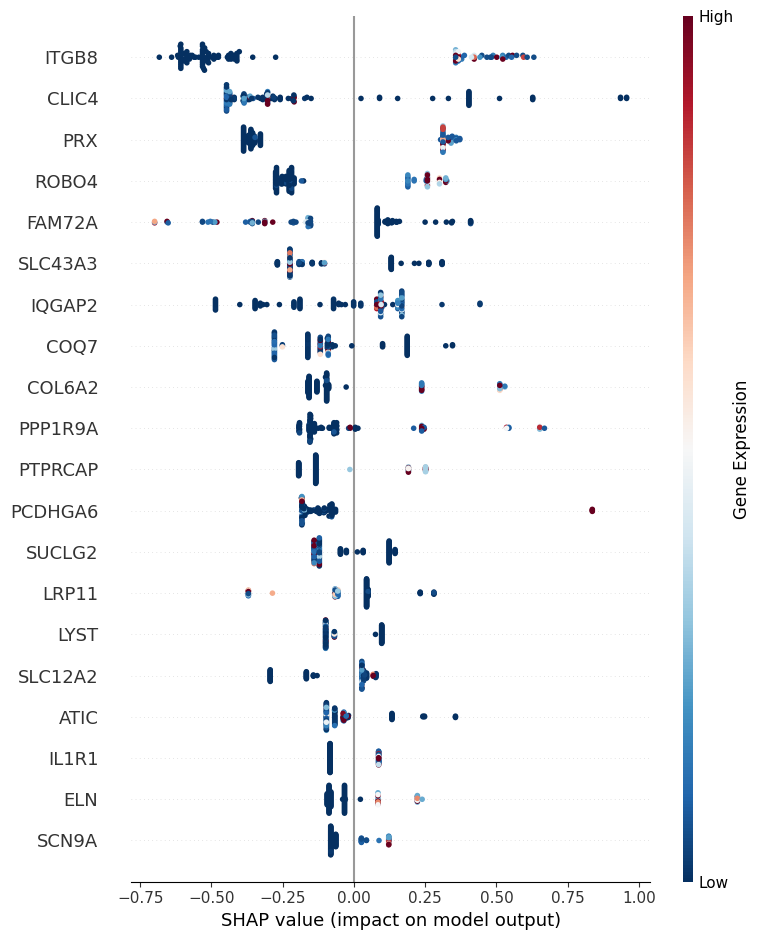

In [8]:
shap_summary_plot(adata=adata,
                  shap_values=shap_data,
                 lineage='HSC_MPP')

### Dependency Plot of New Marker and Reference Marker

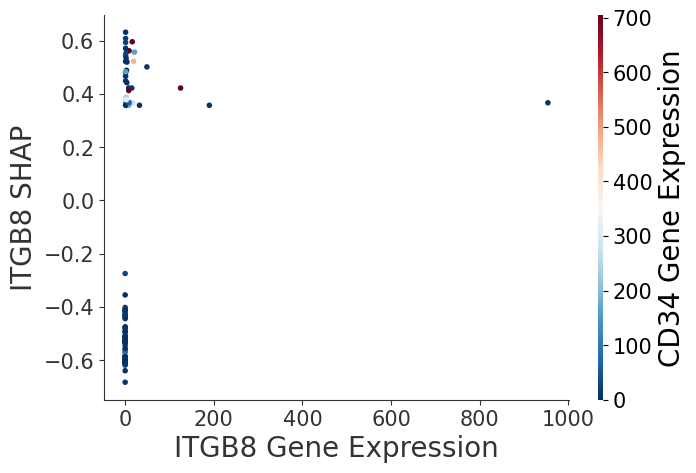

In [9]:
shap_dependency_plot(adata=adata, 
                     shap_values=shap_data, 
                     lineage='HSC_MPP', 
                     marker='ITGB8', 
                     reference='CD34')

# Analysis: Jenks One-Dimensional Clustering of SHAP 

In [13]:
shap_summary, top_shap_marker_df = jenks_shap(adata=adata, shap_values=shap_data, lineage='Lineage')

# Analysis: Generation of Metrics from each Approach

### Metrics for HSC-MPP Cell State

In [21]:
hscmpp_output_data = output_data(lineage='HSC_MPP',
            lfc_data = lfc_data,
auc_data = auc_data,
shap_data = shap_summary)

In [22]:
hscmpp_output_data

,Mean Expression,Log2 Fold Change,Log2 Fold Change Standard Error,P-Value,Adjusted P-Value,Wilcoxon Score,AUC,SHAP,GMean(LFC_AUC_-log10(Padj))
ROBO4,2.760194,1.530747,0.448208,0.000099,0.012265,2.378534,0.727727,0.245834,1.286477
SCN9A,8.476229,1.294954,0.707231,0.006636,0.143393,2.069942,0.698182,0.078793,0.913618
PCDHGA6,2.031303,0.728981,0.442060,0.007863,0.143393,1.139417,0.609091,0.165914,0.720814
S100A16,4.148847,1.236166,0.612770,0.099928,0.410299,0.104447,0.510000,0.000000,0.624811
PIEZO2,4.102152,0.821891,0.671010,0.308173,0.686525,1.823068,0.674545,0.021447,0.449065
...,...,...,...,...,...,...,...,...,...
XPNPEP2,1.297672,-0.014663,0.191233,0.757827,NaN,0.474757,0.545455,0.000000,NaN
ZMYND10,1.524549,0.026349,0.184361,0.711502,NaN,0.242126,0.523182,0.000000,NaN
ZNF2,1.881405,-0.046556,0.186422,0.535550,NaN,-0.607689,0.441818,0.000000,NaN
ZNF474,1.345485,0.155274,0.273704,0.062868,NaN,1.101437,0.605455,0.000000,NaN


# Visualization: Upset Plot of Marker Overlap using Different Approaches

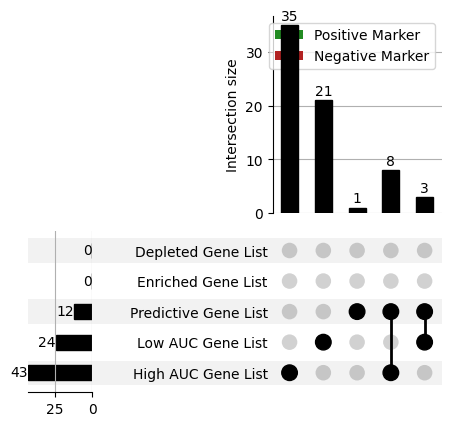

In [24]:
hscmpp_markers = upset_plot(lineage = 'HSC_MPP',
lfc_data=lfc_data, auc_data=auc_data, top_marker_df=top_shap_marker_df)

# Visualization: Correlation of Values

### Correlation of SHAP Values for 3 Select Genes

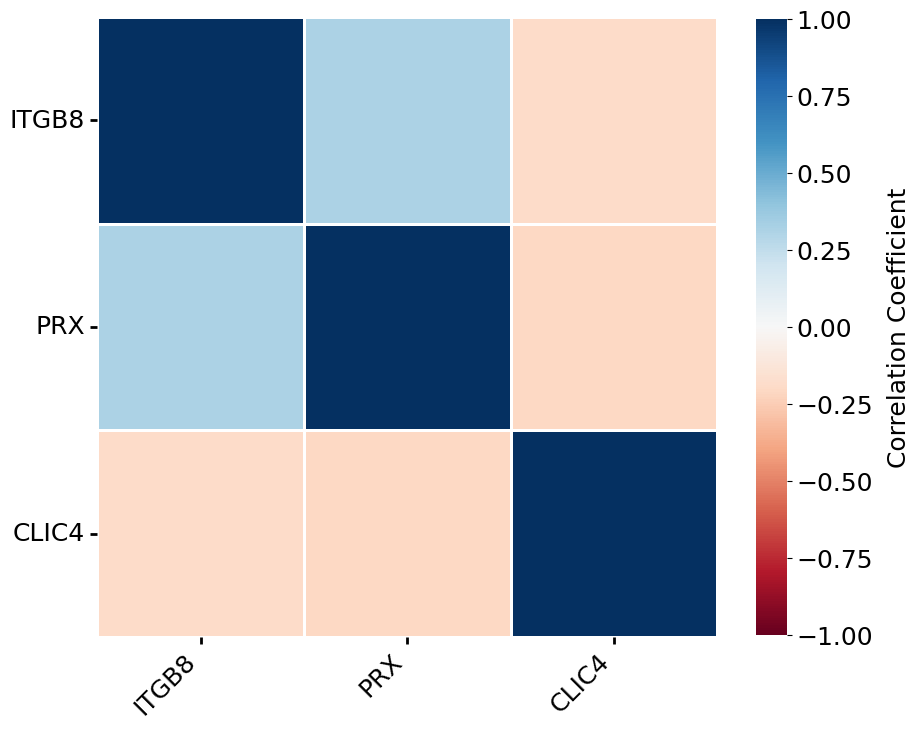

In [27]:
corr_plot(df=shap_data['HSC_MPP'], 
          gene_list=['CLIC4', 'PRX', 'ITGB8'], 
          corr='pearson')

### Correlation of Gene Expression for 3 Select Genes

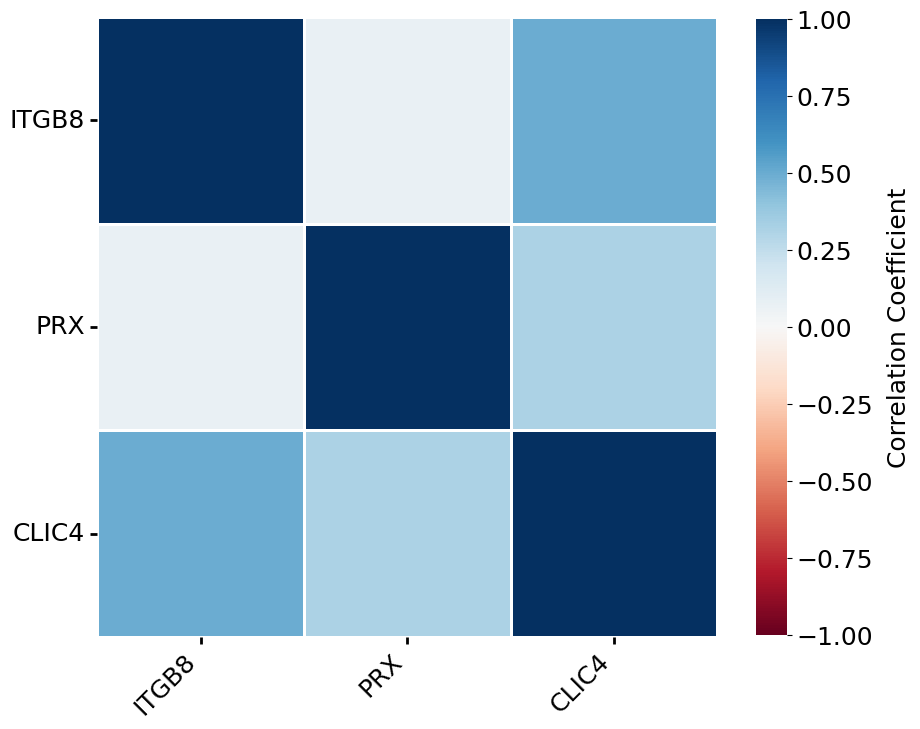

In [28]:
corr_plot(df=adata.to_df(), 
          gene_list=['CLIC4', 'PRX', 'ITGB8'], 
          corr='pearson')

# Visualization: Volcano Plot of All Genes

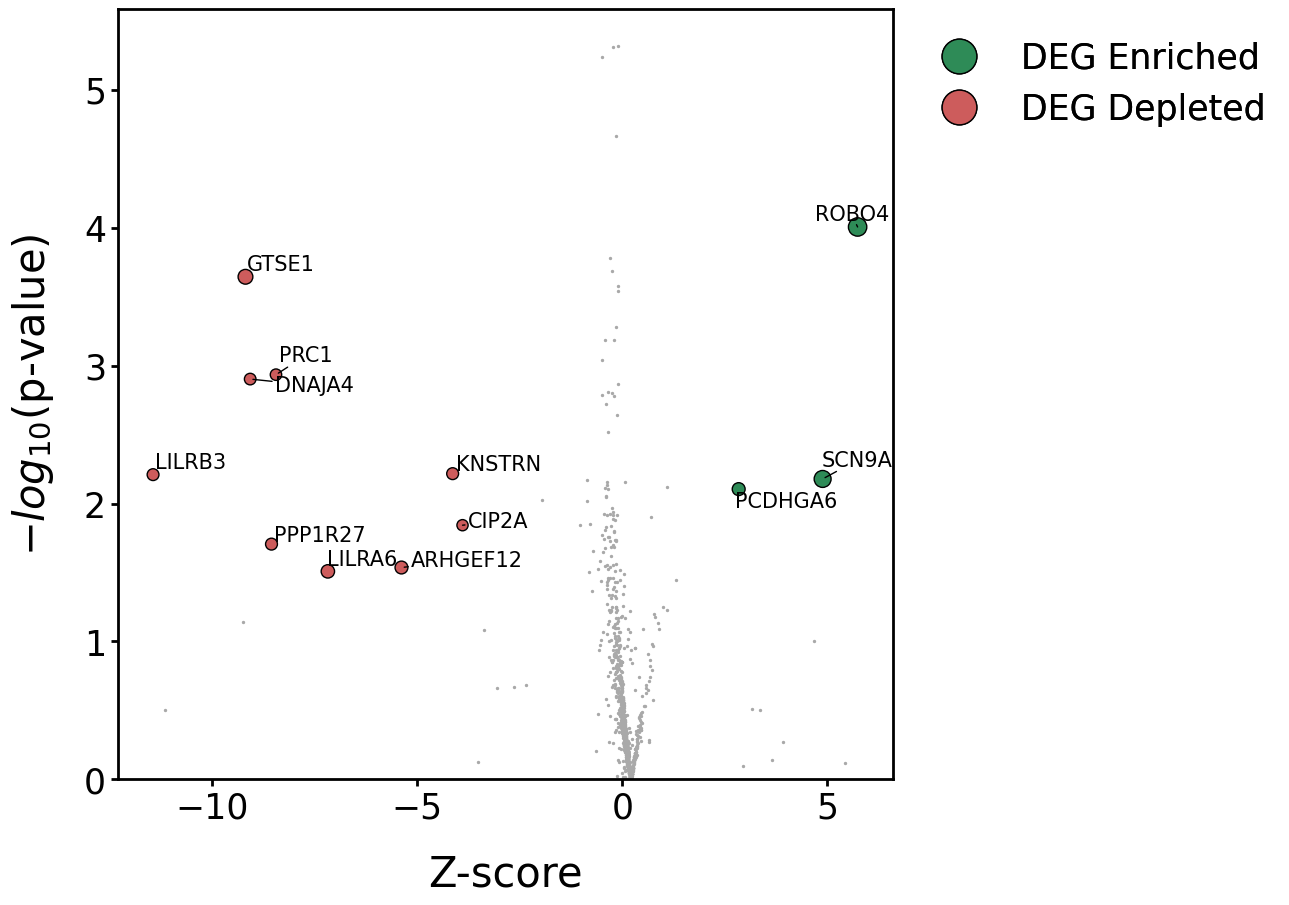

In [29]:
volcano_plot(lineage='HSC_MPP', lfc_data=lfc_data, auc_data=auc_data, shap_data=shap_summary)

# Visualization: Dotplot of SHAP Values for Select Genes 

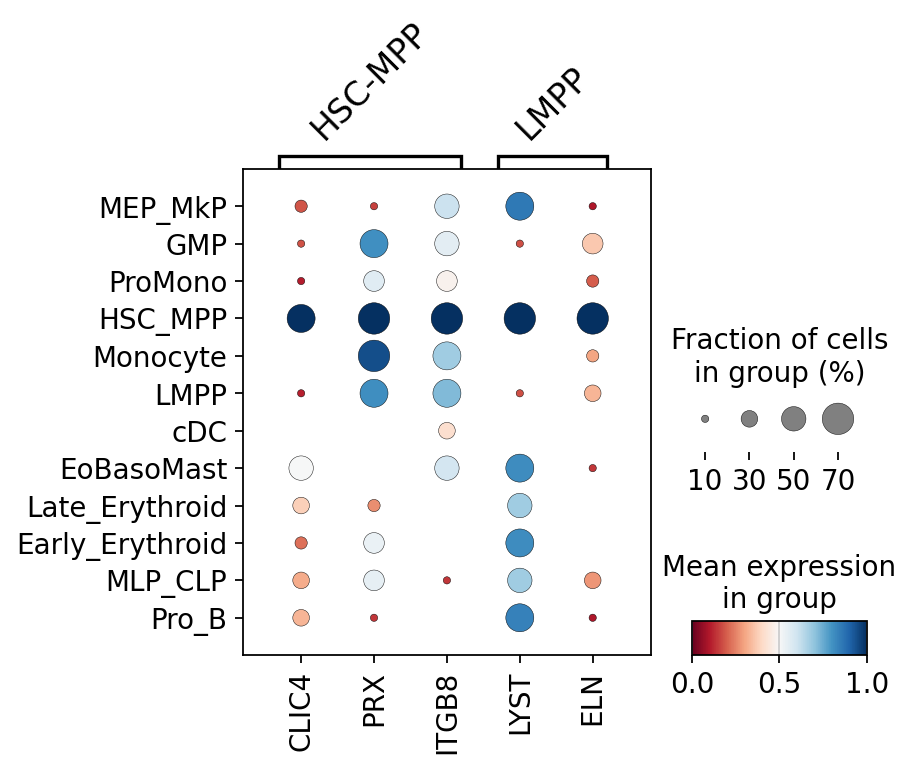

In [31]:
# Note: The "marker" argument takes both dictionaries or lists
shap_dot_plot(df=shap_data['HSC_MPP'], adata=adata, marker = {'HSC-MPP':['CLIC4', 'PRX', 'ITGB8'],
         'LMPP': ['LYST', 'ELN']})

# Visualization: Heatmap of LFC Values for Select Genes

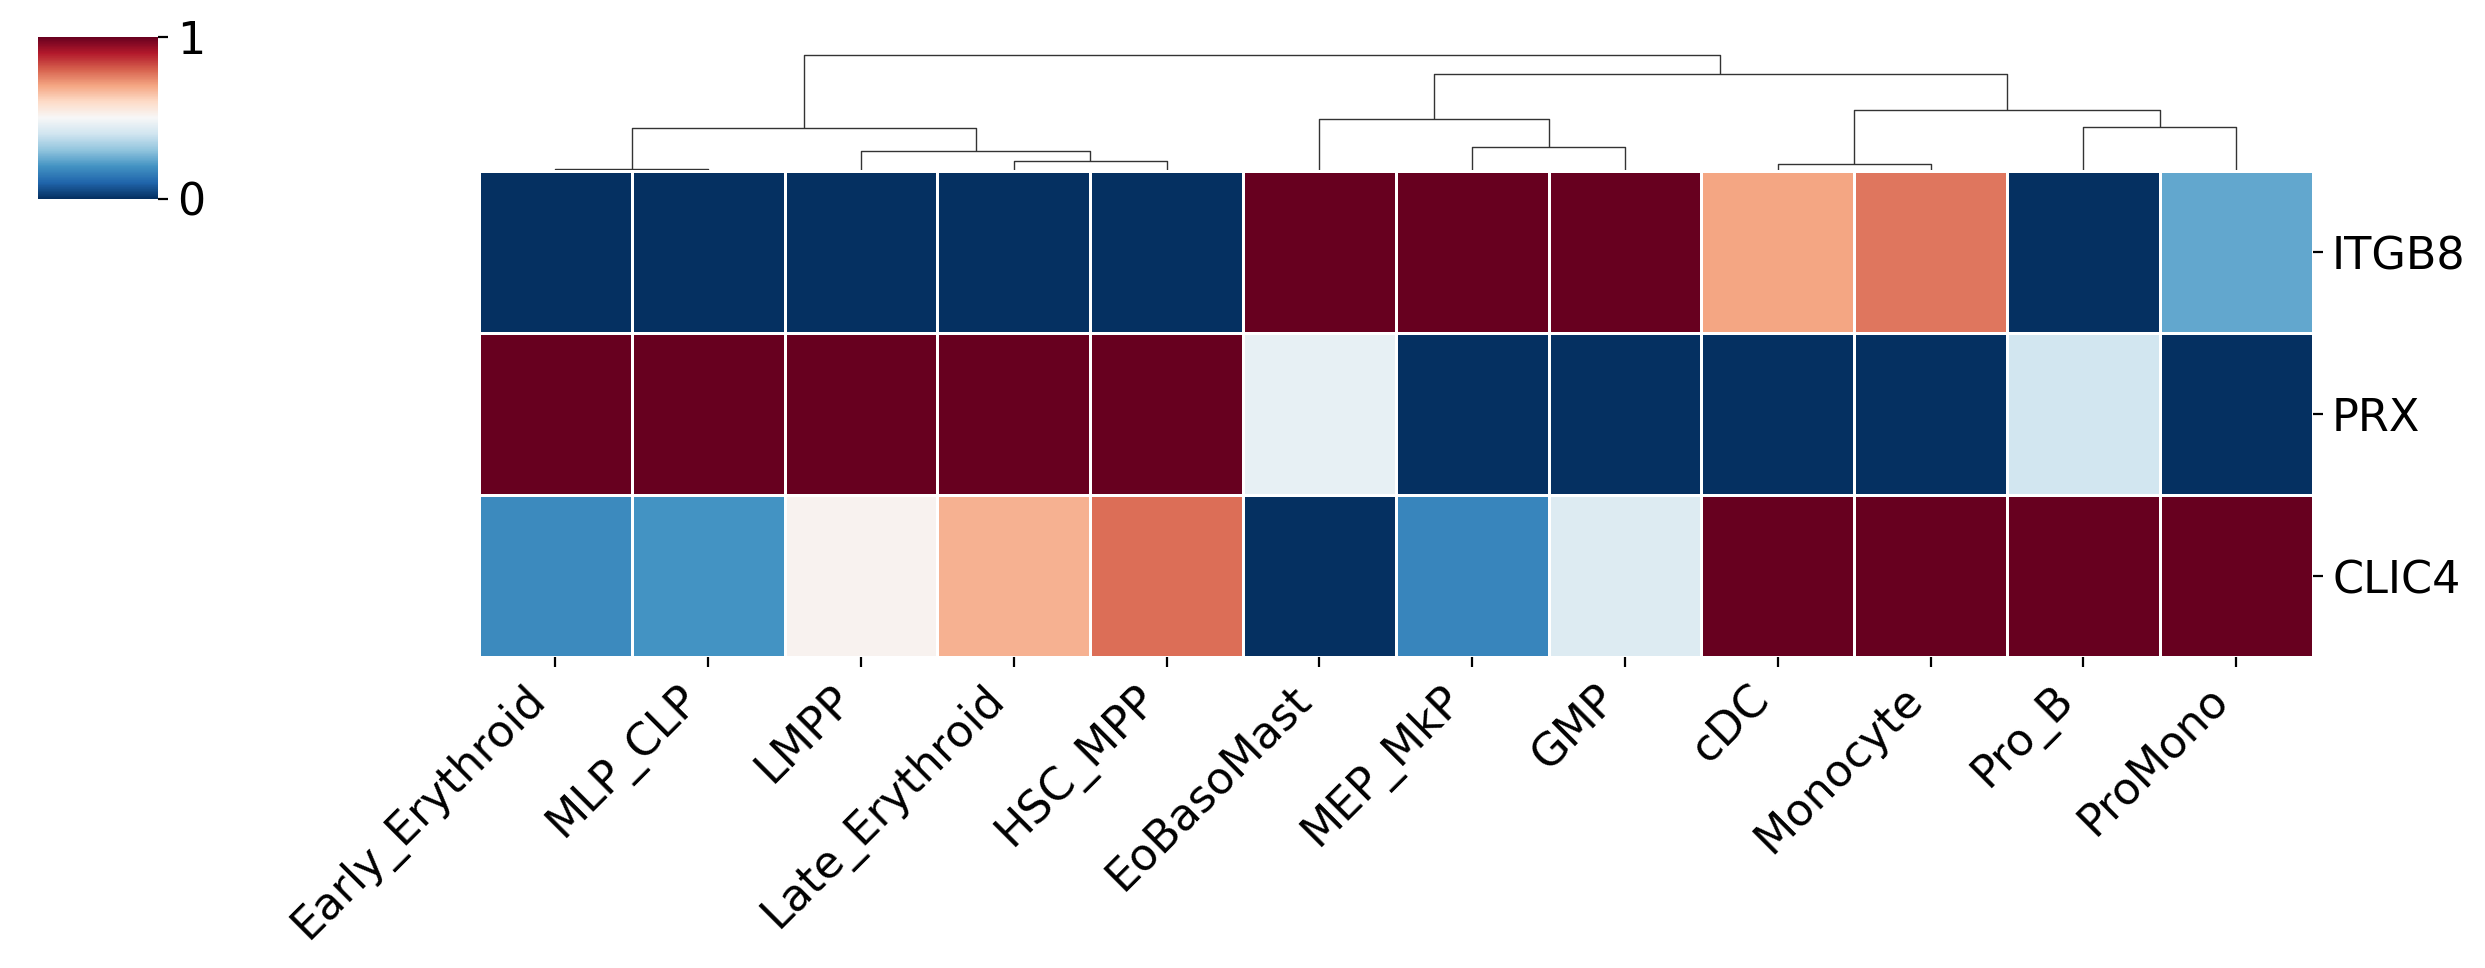

In [36]:
lfc_heatmap_plot(adata = adata,
lineage_label = 'Lineage',
df = lfc_data,
marker = ['CLIC4', 'PRX', 'ITGB8'])

# Visualization: Heatmap of AUC Values for Select Genes

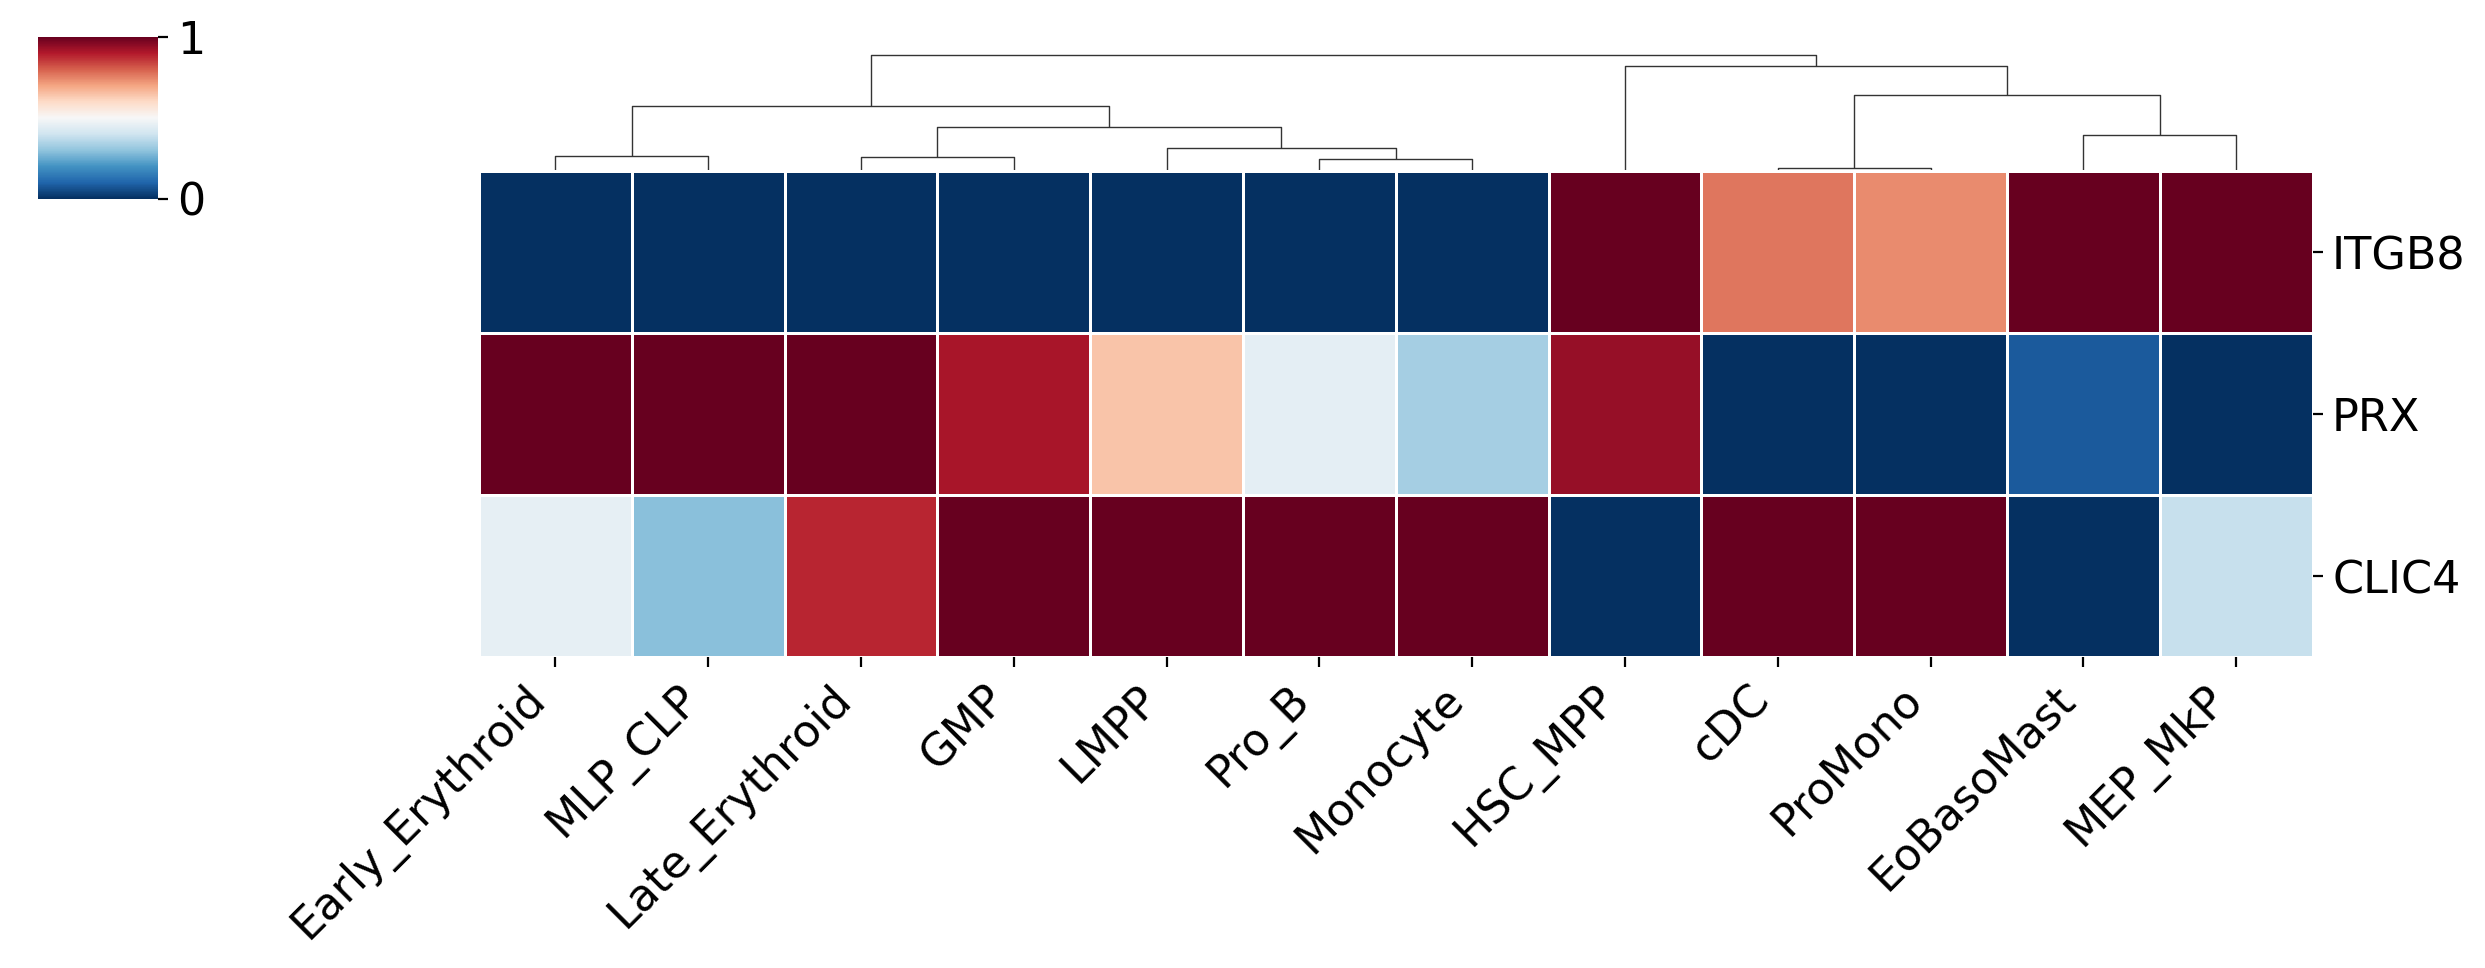

In [35]:
auc_heatmap_plot(adata = adata,
lineage_label = 'Lineage',
df = auc_data,
marker = ['CLIC4', 'PRX', 'ITGB8'])